In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from scipy import linalg as LA

*The dataset1 applesOranges.csv contains 200 measurements (x.1 and x.2) from two types of objects as indicated by the column y. In this exercise, you will use a connectionist neuron with a “binary” transfer function f(h) to classify the objects, i.e., obtain the predicted class y for a datapoint _x_∈R2 by*

*a) Plot the data in a scatter plot (x2 vs x1). Mark the points with different colors to indicate the type of each object*

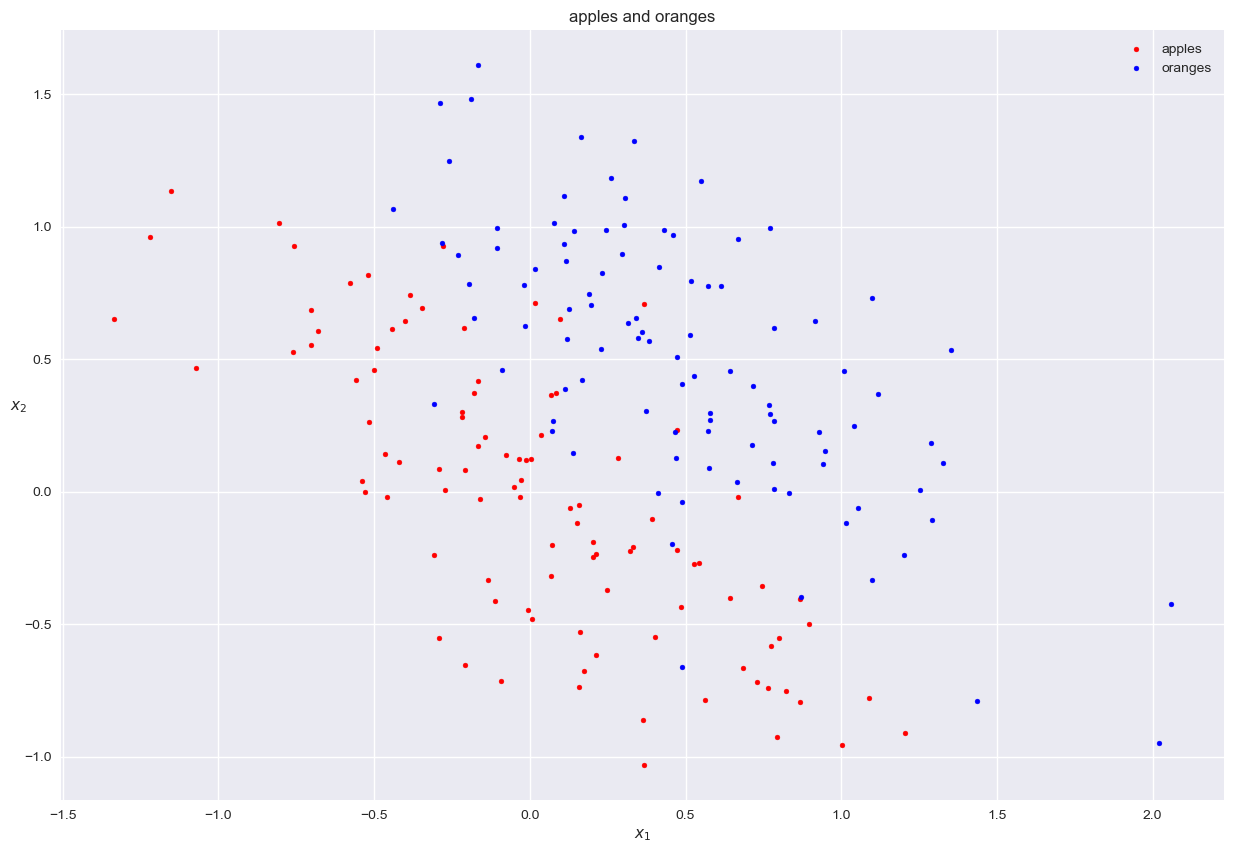

In [3]:
expdat = np.genfromtxt(fname='applesOranges.csv', delimiter=',',dtype=float, skip_header=1)

#Produce a 2D scatter plot for x. Use different markers to distinguish “apple” points from “orange” points. Add a legend to your plot.

f1 = plt.figure(figsize=(15,10))
plt.style.use('seaborn')

x = expdat[:,:2]
y = expdat[:,-1]

plt.scatter(x[y==0,0], x[y==0,1], marker='.', c='r', label='apples')
plt.scatter(x[y==1,0], x[y==1,1], marker='.', c='b', label='oranges')

lgd = plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
plt.title("apples and oranges")
plt.show()

*Set the bias θ = 0. Create a set of 19 weight vectors w = (w1,w2)⊤ pointing from the origin to the upper semi-circle with radius 1 (i.e. if γ denotes the angle between the weight vector and the x-axis, for each γ = 0, 10, . . . , 180 (equally spaced) such that ||w||2 = 1, w1 ∈ [−1, 1], w2 ∈ [0, 1]).*

[[ 1.00000000e+00  0.00000000e+00]
 [ 9.84807753e-01  1.73648178e-01]
 [ 9.39692621e-01  3.42020143e-01]
 [ 8.66025404e-01  5.00000000e-01]
 [ 7.66044443e-01  6.42787610e-01]
 [ 6.42787610e-01  7.66044443e-01]
 [ 5.00000000e-01  8.66025404e-01]
 [ 3.42020143e-01  9.39692621e-01]
 [ 1.73648178e-01  9.84807753e-01]
 [ 6.12323400e-17  1.00000000e+00]
 [-1.73648178e-01  9.84807753e-01]
 [-3.42020143e-01  9.39692621e-01]
 [-5.00000000e-01  8.66025404e-01]
 [-6.42787610e-01  7.66044443e-01]
 [-7.66044443e-01  6.42787610e-01]
 [-8.66025404e-01  5.00000000e-01]
 [-9.39692621e-01  3.42020143e-01]
 [-9.84807753e-01  1.73648178e-01]
 [-1.00000000e+00  1.22464680e-16]]
classification=(19, 200)
[0.675, 0.705, 0.76, 0.745, 0.71, 0.735, 0.755, 0.75, 0.725, 0.69, 0.63, 0.6, 0.565, 0.52, 0.505, 0.465, 0.42, 0.35, 0.325]


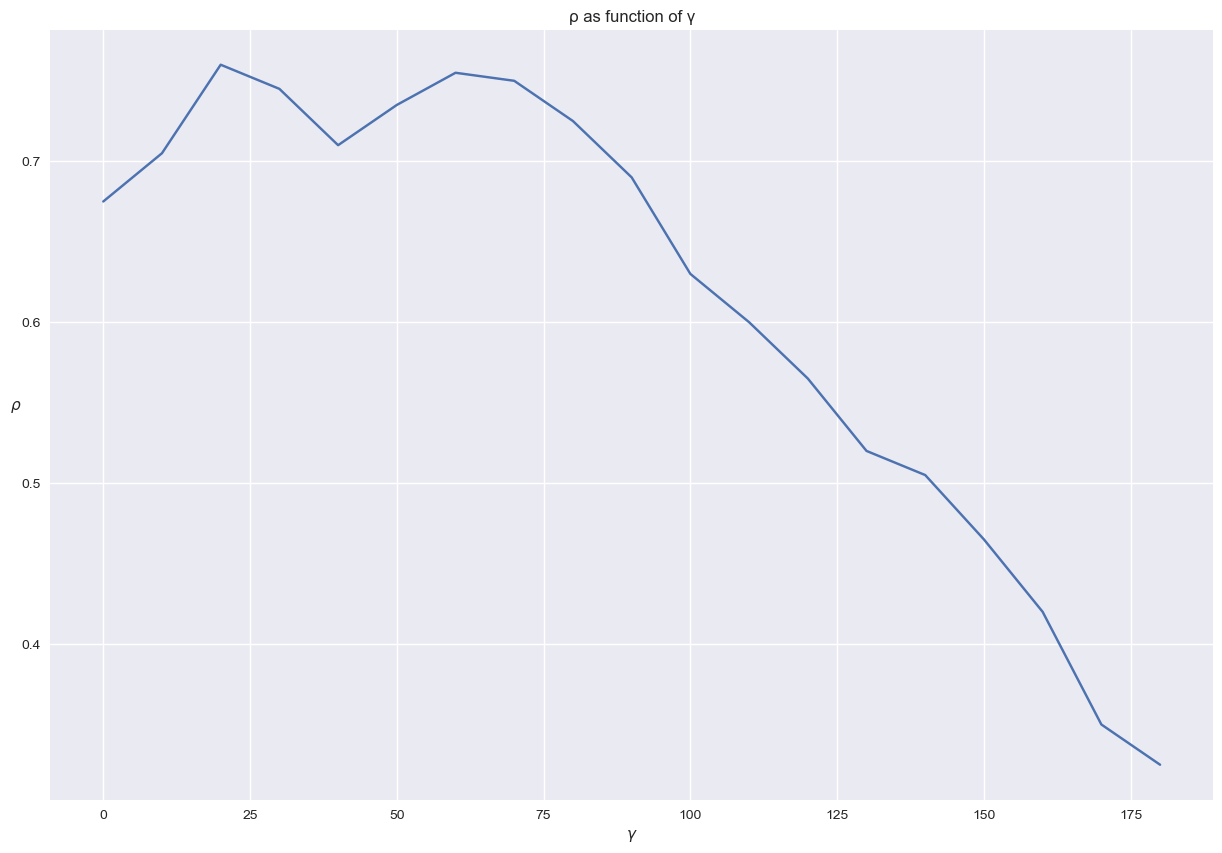

In [4]:

def classify(h):
    t = np.copy(h)
    
    positive =[]
    negative = []
    
    positive = h >=0
    negative = h < 0
    
    t[positive] = 1
    t[negative] = 0
    
    
    return t

#Initialize bias, weights and learning rate

bias = 0

winkel = np.linspace(0,np.pi,19)
radius=1
w1 = radius*np.cos(winkel)
w2 = radius*np.sin(winkel)
w = np.array([w1,w2])
print(w.T)
# print(f'x={x.shape}')
# print(f'w={w.shape}')

#Neuron Input

h = np.matmul(w.T,x.T)-bias

#create a new array that contains the classification of each data point.

classification= classify(h)
print(f'classification={classification.shape}')

#(i) determine % correct classifications ρ of the corresponding neuron for each weight vector w

genauikeit=[]

for i in range(h.shape[0]):
    tn, tp, fp, fn = 0,0,0,0
    for j in range(h.shape[1]):
        
        #Number of misclassifications (true negatives/Apples/00)
        if classification[i,j] == 0 and y[j] == 0:
            tn+=1
        #Number of correct classifications (true positives/Oranges/11)
        elif classification[i,j] == 1 and y[j] == 1:
            tp+=1
        #number of apples that are classified as oranges (false positives/01)
        elif classification[i,j] == 0 and y[j] == 1:
            fp+=1
        #number of oranges that are classified as apples (false negatives/10)
        elif classification[i,j] == 1 and y[j] == 0:
            fn+=1
    
    prozent = (tp+tn)/(tp+tn+fp+fn)
    genauikeit.append(prozent)
print(genauikeit)
        
# (ii) plot a curve showing ρ as a function of γ

f2 = plt.figure(figsize=(15,10))

plt.plot((winkel[::-1]*180)/math.pi,genauikeit[::-1])

plt.xlabel('$γ$')
plt.ylabel('$ρ$', rotation='horizontal')
plt.title("ρ as function of γ")
plt.show()


In [5]:
def genauigkeit(shape):
    genauikeit_bias = []
    tn, tp, fp, fn = 0,0,0,0
    for j in range(shape):
        
        #Number of misclassifications (true negatives/Apples/00)
        if classification[0,j] == 0 and y[j] == 0:
            tn+=1
        #Number of correct classifications (true positives/Oranges/11)
        elif classification[0,j] == 1 and y[j] == 1:
            tp+=1
        #number of apples that are classified as oranges (false positives/01)
        elif classification[0,j] == 0 and y[j] == 1:
            fp+=1
        #number of oranges that are classified as apples (false negatives/10)
        elif classification[0,j] == 1 and y[j] == 0:
            fn+=1
    
    prozent = (tp+tn)/(tp+tn+fp+fn)
    genauikeit_bias.append(prozent)
    return genauikeit_bias

*c) Out of the 19 weight vectors from above, pick the w that yields the best performance. Now,
vary the bias θ ∈ [−3, 3] and pick the value of θ that gives the best performance.*

In [6]:
best_weight = w[:,np.argmax(genauikeit),np.newaxis]
print(f'Best weight vector:\n {best_weight}')


#Initialize bias, weights and learning rate

bias = np.linspace(-3,3,500)

#Neuron Input

h0 = np.matmul(best_weight.T,x.T)

genauikeit_bias = []

for k in range(len(bias)):
    h = h0 - bias[k]
    classification= classify(h)
    tn, tp, fp, fn = 0,0,0,0
    for j in range(h.shape[1]):
        
        #Number of misclassifications (true negatives/Apples/00)
        if classification[0,j] == 0 and y[j] == 0:
            tn+=1
        #Number of correct classifications (true positives/Oranges/11)
        elif classification[0,j] == 1 and y[j] == 1:
            tp+=1
        #number of apples that are classified as oranges (false positives/01)
        elif classification[0,j] == 0 and y[j] == 1:
            fp+=1
        #number of oranges that are classified as apples (false negatives/10)
        elif classification[0,j] == 1 and y[j] == 0:
            fn+=1
    
    prozent = (tp+tn)/(tp+tn+fp+fn)
    genauikeit_bias.append(prozent)
    
best_bias = bias[np.argmax(genauikeit_bias)]
print(f'\nBest bias: {best_bias} with accuracy of {np.max(genauikeit_bias)*100}%')

Best weight vector:
 [[0.93969262]
 [0.34202014]]

Best bias: 0.13827655310621223 with accuracy of 80.5%


*d) Plot the data points and color them according to the predicted classification when using the w and θ that led to the highest performance. Plot the weight vector w in the same plot. How do you interpret your results?*

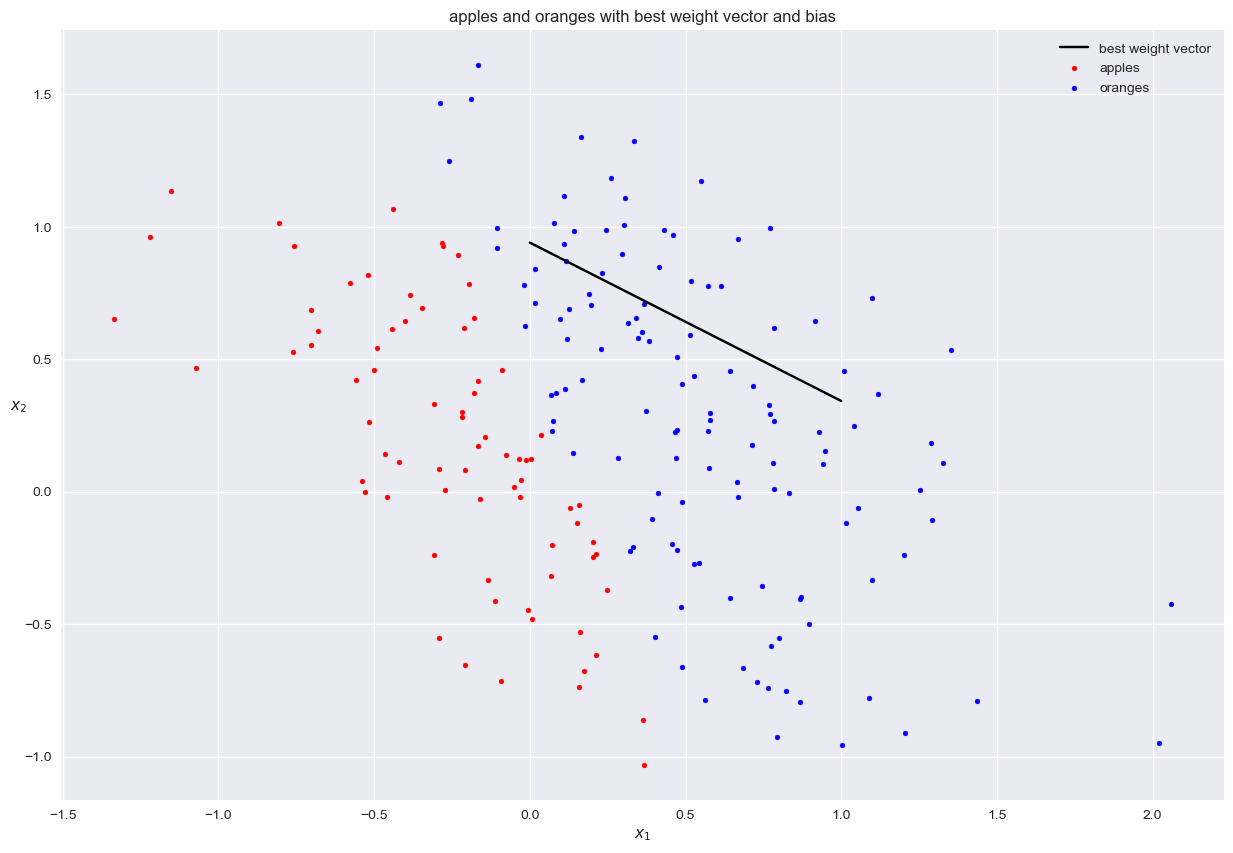

In [7]:
h_classificated = classify(h0 - best_bias)

x = expdat[:,:2]
y = h_classificated

#New Data classificated with best weight vector and bias

x_neu =np.column_stack((x,y.T))
# x_neu.columns = ['x1','x2','y']
# x_neu

f3 = plt.figure(figsize=(15,10))

plt.scatter(x_neu[x_neu[:,-1]==0,0], x_neu[x_neu[:,-1]==0,1], marker='.', c='r', label='apples')
plt.scatter(x_neu[x_neu[:,-1]==1,0], x_neu[x_neu[:,-1]==1,1], marker='.', c='b', label='oranges')
plt.plot(best_weight, c='k', label='best weight vector')

lgd = plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
plt.title("apples and oranges with best weight vector and bias")
plt.show()

*e) Find the best combination of w and θ by exploring all combinations of γ and θ (within a reasonable range and precision). Compute and plot the performance of all combinations in a heatmap.*

In [8]:
#Initialize bias, weights and learning rate

bias = np.linspace(-3,3,600)

winkel = np.linspace(0,np.pi,19)
radius=1
w1 = radius*np.cos(winkel)
w2 = radius*np.sin(winkel)
w = np.array([w1,w2])
y = expdat[:,-1]
x = expdat[:,:2]


# print(w.T.shape)
# print(np.matmul(w.T[18],x.T))
# print(x.T.shape)

genauikeit_bias = []
best_combinations = []
x_neu_liste = []
step = 0
for k in range(w.T.shape[0]):
    for l in range(len(bias)):
        #Neuron Input
        h = np.matmul(w.T[k],x.T)-bias[l]
        #Binary Transfer Function
        classification= classify(h)
        
        tn, tp, fp, fn = 0,0,0,0
        for i in range(h.shape[0]):
        
            #Number of misclassifications (true negatives/Apples/00)
            if classification[i] == 0 and y[i] == 0:
                tn+=1
            #Number of correct classifications (true positives/Oranges/11)
            elif classification[i] == 1 and y[i] == 1:
                tp+=1
            #number of apples that are classified as oranges (false positives/01)
            elif classification[i] == 0 and y[i] == 1:
                fp+=1
            #number of oranges that are classified as apples (false negatives/10)
            elif classification[i] == 1 and y[i] == 0:
                fn+=1
        
        prozent = (tp+tn)/(tp+tn+fp+fn)
        if prozent >= 0:
            step+=1 #Anzahl der Kombinationen 
            
            x_neu =np.column_stack((x,classification.T))
            
            x_neu_liste.append(x_neu)
            best_combinations.append([(np.arccos(w.T[k][0])/np.pi)*180,bias[l],prozent])
        
x_neu=np.array(x_neu_liste)


In [9]:
x=np.array([0,1,2,3])

In [10]:
#Ausgabe der Datenpunkte, die mit dem besten Gewichtsvektor und Bias klassifiziert werden

print(f'      Weight Vector     |    Bias    | Accuracy')

print(f'---------------------------------------------------')

# Array
best_combinations = np.asarray(best_combinations)
# for j in range(best_combinations.shape[0]):
#     print(f'{best_combinations[j,0]} | {best_combinations[j,1]:8.4f}   | {best_combinations[j,2]:8.3f}')

# Dataframe
best_combinations_dataframe=pd.DataFrame(best_combinations)
best_combinations_dataframe.columns = ['Weight Vector','Bias','Accuracy']

      Weight Vector     |    Bias    | Accuracy
---------------------------------------------------


<AxesSubplot:xlabel='Bias', ylabel='Degree'>

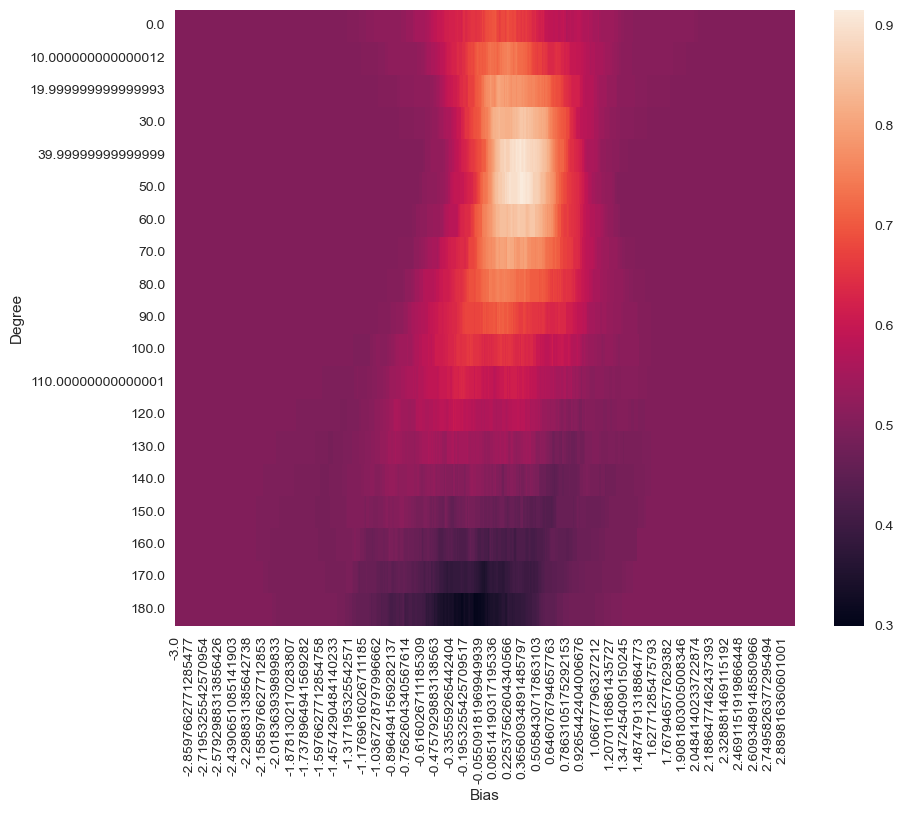

In [11]:
data = pd.DataFrame(data={'Degree':best_combinations[:,0], 'Bias':best_combinations[:,1], 'Correct':best_combinations[:,2]})
data = data.pivot(index='Degree', columns='Bias', values='Correct')


fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
sns.heatmap(data)

*Can the grid-search optimization procedure used in (e) be applied to any classification problem? Discuss potential problems and give an application example in which the above method must fail.:

1._ The computational time to generate all the possible combinations in a certain range for all the parameters such as weights, bias values and accuracy can somehow a limitation cause it would take a really long time to analyze all the information

2.- How to determine the ranges for each one of the parameters can be really hard to find.

3.-

*

In [25]:
a = ([0,1,3])
a.reverse()
a
# for j in enumerate([a]):
#     for h in enumerate(a.reverse()):
#         print(j[0],h[0])
        
        

[3, 1, 0]